# Required python modules
scikit-learn, pandas, seaborn, matplotlib
# Classifiers used
Logistic Regression, KNN, Decision Tree, Random Forest, SVM

# Reading Data using Pandas

In [1]:
import pandas as pd
df=pd.read_csv("NearestEarthObjects_Dataset_1.csv")
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


# Info of the data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


# Checking for missing values
Every column equals zero implies data have no missing values

In [3]:
df.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

# Data Preprocessing
Dropping of columns which are unnecessary                                                                        
Converting of categorical data to numerical data

In [4]:
from sklearn.preprocessing import LabelEncoder

df.drop(columns=['id', 'name'], inplace=True)
df['orbiting_body'] = LabelEncoder().fit_transform(df['orbiting_body'])
df['sentry_object'] = df['sentry_object'].apply({True : 1, False : 0}.get)
df['hazardous'] = df['hazardous'].apply({True : 1, False : 0}.get)
df.head()

# Summary of the data

In [ ]:
df.describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
count,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.0,90836.0,90836.000000,90836.000000
mean,0.127432,0.284947,48066.918918,3.706655e+07,0.0,0.0,23.527103,0.097318
std,0.298511,0.667491,25293.296961,2.235204e+07,0.0,0.0,2.894086,0.296392
min,0.000609,0.001362,203.346433,6.745533e+03,0.0,0.0,9.230000,0.000000
25%,0.019256,0.043057,28619.020645,1.721082e+07,0.0,0.0,21.340000,0.000000
50%,0.048368,0.108153,44190.117890,3.784658e+07,0.0,0.0,23.700000,0.000000
75%,0.143402,0.320656,62923.604633,5.654900e+07,0.0,0.0,25.700000,0.000000
max,37.892650,84.730541,236990.128088,7.479865e+07,0.0,0.0,33.200000,1.000000


# DataFrame Co-relation
A whole row or column filled with NaN implies that the row or column is not co related with any other row or column, which states that the row or column will have no impact on the result

<function matplotlib.pyplot.show(close=None, block=None)>

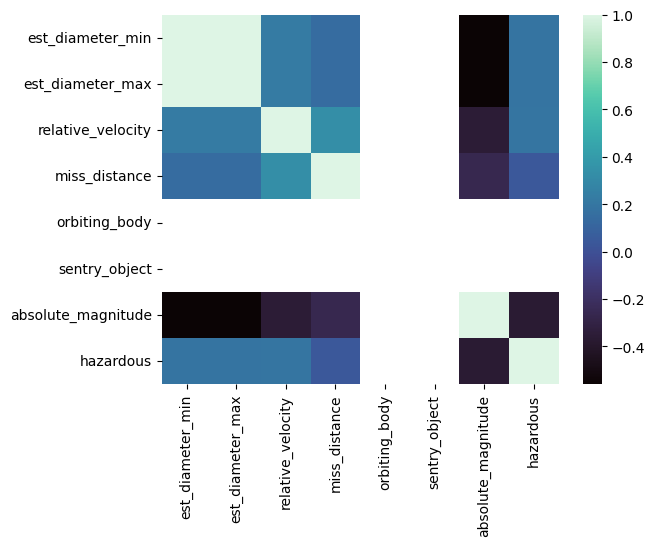

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(numeric_only=True), cmap='mako')
plt.show


# Dropping Unnecessary data

In [ ]:
df.drop(columns=['orbiting_body', 'sentry_object'], inplace=True)

# Splitting Training and Test Data

In [ ]:
from sklearn.model_selection import train_test_split

Y = df['hazardous']
X = df.drop(columns='hazardous')

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,train_size=0.75)
X_train.head()


,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
1547,0.038420,0.085909,21269.330326,4.018554e+07,24.20
43985,0.013949,0.031192,21503.525125,8.959865e+06,26.40
63738,0.025384,0.056760,51833.004694,5.643930e+07,25.10
79744,0.012605,0.028186,65603.509021,7.124748e+07,26.62
57743,0.008405,0.018795,25333.155600,3.082989e+06,27.50


# Scaling Data

In [ ]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler() # Machine Instance
train_scaled=pd.DataFrame(sc.fit_transform(X_train)) # Scaling the train set
test_scaled=pd.DataFrame(sc.transform(X_test)) # Scaling the test set
train_scaled.head()

,0,1,2,3,4
0,-0.297258,-0.297258,-1.058213,0.137580,0.232705
1,-0.379234,-0.379234,-1.048967,-1.259584,0.992368
2,-0.340929,-0.340929,0.148432,0.864839,0.543476
3,-0.383737,-0.383737,0.692087,1.527417,1.068334
4,-0.397807,-0.397807,-0.897774,-1.522540,1.372199


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model=LogisticRegression()
model.fit(train_scaled,Y_train)

predict_train=model.predict(train_scaled)
predict_test=model.predict(test_scaled)

acc_train=accuracy_score(predict_train,Y_train)
acc_test=accuracy_score(predict_test,Y_test)

print('Accuracy of predictions on train data:',round(acc_train*100,2),'%')
print('Accuracy of predictions on test data:',round(acc_test*100,2),'%')
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, predict_train))
print("\nClassification Report:\n", classification_report(Y_test, predict_train))

Accuracy of predictions on train data: 90.21 %
Accuracy of predictions on test data: 90.25 %


# KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(train_scaled,Y_train)

predictions_train=model.predict(train_scaled)
predictions_test=model.predict(test_scaled)

acc_train=accuracy_score(Y_train,predictions_train)
acc_test=accuracy_score(Y_test,predictions_test)

print('Accuracy of predictions on train data:',round(acc_train*100,2),'%')
print('Accuracy of predictions on test data:',round(acc_test*100,2),'%')
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, predict_train))
print("\nClassification Report:\n", classification_report(Y_test, predict_train))

Accuracy of predictions on train data: 93.01 %
Accuracy of predictions on test data: 90.18 %


## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier() 
model.fit(train_scaled,Y_train)

predictions_train=model.predict(train_scaled)
predictions_test=model.predict(test_scaled)

acc_train=accuracy_score(Y_train,predictions_train)
acc_test=accuracy_score(Y_test,predictions_test)

print('Accuracy of predictions on train data:',round(acc_train*100,2),'%')
print('Accuracy of predictions on test data:',round(acc_test*100,2),'%')
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, predict_train))
print("\nClassification Report:\n", classification_report(Y_test, predict_train))

Accuracy of predictions on train data: 100.0 %
Accuracy of predictions on test data: 89.44 %


# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
model.fit(train_scaled,Y_train)

predict_train=model.predict(train_scaled)
predict_test=model.predict(test_scaled)

acc_train=accuracy_score(predict_train,Y_train)
acc_test=accuracy_score(predict_test,Y_test)

print('Accuracy of predictions on train data:',round(acc_train*100,2),'%')
print('Accuracy of predictions on test data:',round(acc_test*100,2),'%')
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, predict_train))
print("\nClassification Report:\n", classification_report(Y_test, predict_train))

Accuracy of predictions on train data: 100.0 %
Accuracy of predictions on test data: 91.93 %


# SVM classifier

In [ ]:
from sklearn.svm import SVC

model = SVC()
model.fit(train_scaled,Y_train)

predictions_train=model.predict(train_scaled)
predictions_test=model.predict(test_scaled)

acc_train=accuracy_score(Y_train,predictions_train)
acc_test=accuracy_score(Y_test,predictions_test)

print('Accuracy of predictions on train data:',round(acc_train*100,2),'%')
print('Accuracy of predictions on test data:',round(acc_test*100,2),'%')
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, predict_train))
print("\nClassification Report:\n", classification_report(Y_test, predict_train))

Accuracy of predictions on train data: 91.1 %
Accuracy of predictions on test data: 91.06 %
